In [2]:
import requests
import json
import pandas as pd
import missingno as msno
import os

In [3]:
key = '6c727165796a756e35316873464f72'
base_url = "http://openapi.seoul.go.kr:8088/"+key+"/json/tbLnOpendataRtmsV/"

In [4]:
## 전국, 서울, 강북14, 강남11, 수도권 평균 매매
total_m = 'https://data-api.kbland.kr/bfmstat/weekMnthlyHuseTrnd/priceIndex?%EA%B8%B0%EA%B0%84=10&%EB%A7%A4%EB%A7%A4%EC%A0%84%EC%84%B8%EC%BD%94%EB%93%9C=01&%EB%A7%A4%EB%AC%BC%EC%A2%85%EB%B3%84%EA%B5%AC%EB%B6%84=01&%EC%9B%94%EA%B0%84%EC%A3%BC%EA%B0%84%EA%B5%AC%EB%B6%84%EC%BD%94%EB%93%9C=01&%EC%A7%80%EC%97%AD%EC%BD%94%EB%93%9C=&%EC%A1%B0%ED%9A%8C%EC%8B%9C%EC%9E%91%EC%9D%BC%EC%9E%90=&%EC%A1%B0%ED%9A%8C%EC%A2%85%EB%A3%8C%EC%9D%BC%EC%9E%90=&type=false&%EB%A9%94%EB%89%B4%EC%BD%94%EB%93%9C=1'
## 전세
total_j = 'https://data-api.kbland.kr/bfmstat/weekMnthlyHuseTrnd/priceIndex?%EA%B8%B0%EA%B0%84=10&%EB%A7%A4%EB%A7%A4%EC%A0%84%EC%84%B8%EC%BD%94%EB%93%9C=02&%EB%A7%A4%EB%AC%BC%EC%A2%85%EB%B3%84%EA%B5%AC%EB%B6%84=01&%EC%9B%94%EA%B0%84%EC%A3%BC%EA%B0%84%EA%B5%AC%EB%B6%84%EC%BD%94%EB%93%9C=01&%EC%A7%80%EC%97%AD%EC%BD%94%EB%93%9C=&%EC%A1%B0%ED%9A%8C%EC%8B%9C%EC%9E%91%EC%9D%BC%EC%9E%90=&%EC%A1%B0%ED%9A%8C%EC%A2%85%EB%A3%8C%EC%9D%BC%EC%9E%90=&type=false&%EB%A9%94%EB%89%B4%EC%BD%94%EB%93%9C=1'

In [5]:
## 강북 14 매매
riverTop_m = 'https://data-api.kbland.kr/bfmstat/weekMnthlyHuseTrnd/priceIndex?%EA%B8%B0%EA%B0%84=10&%EB%A7%A4%EB%A7%A4%EC%A0%84%EC%84%B8%EC%BD%94%EB%93%9C=01&%EB%A7%A4%EB%AC%BC%EC%A2%85%EB%B3%84%EA%B5%AC%EB%B6%84=01&%EC%9B%94%EA%B0%84%EC%A3%BC%EA%B0%84%EA%B5%AC%EB%B6%84%EC%BD%94%EB%93%9C=01&%EC%A7%80%EC%97%AD%EC%BD%94%EB%93%9C=1A0000&%EC%A1%B0%ED%9A%8C%EC%8B%9C%EC%9E%91%EC%9D%BC%EC%9E%90=&%EC%A1%B0%ED%9A%8C%EC%A2%85%EB%A3%8C%EC%9D%BC%EC%9E%90=&type=false&%EB%A9%94%EB%89%B4%EC%BD%94%EB%93%9C=1'
## 전세
riverTop_j = 'https://data-api.kbland.kr/bfmstat/weekMnthlyHuseTrnd/priceIndex?%EA%B8%B0%EA%B0%84=10&%EB%A7%A4%EB%A7%A4%EC%A0%84%EC%84%B8%EC%BD%94%EB%93%9C=02&%EB%A7%A4%EB%AC%BC%EC%A2%85%EB%B3%84%EA%B5%AC%EB%B6%84=01&%EC%9B%94%EA%B0%84%EC%A3%BC%EA%B0%84%EA%B5%AC%EB%B6%84%EC%BD%94%EB%93%9C=01&%EC%A7%80%EC%97%AD%EC%BD%94%EB%93%9C=1A0000&%EC%A1%B0%ED%9A%8C%EC%8B%9C%EC%9E%91%EC%9D%BC%EC%9E%90=&%EC%A1%B0%ED%9A%8C%EC%A2%85%EB%A3%8C%EC%9D%BC%EC%9E%90=&type=false&%EB%A9%94%EB%89%B4%EC%BD%94%EB%93%9C=1'

In [6]:
# 강남 11 매ㅐ
riverB_m= 'https://data-api.kbland.kr/bfmstat/weekMnthlyHuseTrnd/priceIndex?%EA%B8%B0%EA%B0%84=10&%EB%A7%A4%EB%A7%A4%EC%A0%84%EC%84%B8%EC%BD%94%EB%93%9C=01&%EB%A7%A4%EB%AC%BC%EC%A2%85%EB%B3%84%EA%B5%AC%EB%B6%84=01&%EC%9B%94%EA%B0%84%EC%A3%BC%EA%B0%84%EA%B5%AC%EB%B6%84%EC%BD%94%EB%93%9C=01&%EC%A7%80%EC%97%AD%EC%BD%94%EB%93%9C=1B0000&%EC%A1%B0%ED%9A%8C%EC%8B%9C%EC%9E%91%EC%9D%BC%EC%9E%90=&%EC%A1%B0%ED%9A%8C%EC%A2%85%EB%A3%8C%EC%9D%BC%EC%9E%90=&type=false&%EB%A9%94%EB%89%B4%EC%BD%94%EB%93%9C=1'
# 전세
riverB_j = 'https://data-api.kbland.kr/bfmstat/weekMnthlyHuseTrnd/priceIndex?%EA%B8%B0%EA%B0%84=10&%EB%A7%A4%EB%A7%A4%EC%A0%84%EC%84%B8%EC%BD%94%EB%93%9C=02&%EB%A7%A4%EB%AC%BC%EC%A2%85%EB%B3%84%EA%B5%AC%EB%B6%84=01&%EC%9B%94%EA%B0%84%EC%A3%BC%EA%B0%84%EA%B5%AC%EB%B6%84%EC%BD%94%EB%93%9C=01&%EC%A7%80%EC%97%AD%EC%BD%94%EB%93%9C=1B0000&%EC%A1%B0%ED%9A%8C%EC%8B%9C%EC%9E%91%EC%9D%BC%EC%9E%90=&%EC%A1%B0%ED%9A%8C%EC%A2%85%EB%A3%8C%EC%9D%BC%EC%9E%90=&type=false&%EB%A9%94%EB%89%B4%EC%BD%94%EB%93%9C=1'


In [7]:
import pandas as pd
import numpy as np
import requests

## json 형태를 dataframe 형태로 변경
def make_dataframe(data, cols, num):
	# num 은 json 내에 실제 데이터 외 추가로 붙는 데이터를 끊어내기 위한 index
    tmp_df = pd.DataFrame.from_dict(data, orient='index')
    region_name = tmp_df.loc['지역명']
    transpose_df = pd.DataFrame(tmp_df.loc['dataList'].values[0][:num]).transpose()
    transpose_df.columns = cols
    transpose_df.index = region_name
    return transpose_df


def data_gathering(total_json, num):
    df_list = []
    cols = total_json['dataBody']['data']['날짜리스트']
    
    for data in total_json['dataBody']['data']['데이터리스트']:
        tmp_df = make_dataframe(data, cols, num)
        tmp_df['상위지역'] = np.nan
    
        df_list.append(tmp_df)
    return pd.concat(df_list)

In [8]:
def get_df(url):
    html = requests.get(url).json()
    df = data_gathering(html, -3)
    df = df.T
    df.rename(columns={'지역명': '연도'}, inplace=True)
    try: df = df.drop('상위지역', axis=0)
    except:
        pass
    return df

In [9]:
total_m_df = get_df(total_m)

In [10]:
riverTop_j_df = get_df(riverTop_j)
riverTop_j_df

지역명,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구
201410,75.138408,74.361555,67.889655,70.067290,68.344788,68.330565,67.772128,63.173014,65.656477,69.077775,65.598300,67.336967,73.278797,62.467576
201411,75.509187,74.500966,68.128384,70.308796,68.450574,68.467272,67.883398,63.489182,65.899150,69.286508,65.822593,67.606800,73.376193,62.726749
201412,76.069846,74.623586,68.342537,70.621199,68.677169,68.791945,68.137165,63.849863,66.256503,69.661403,65.995952,67.770059,73.698112,62.821933
201501,76.417826,74.721640,68.555559,70.766404,68.906747,69.052369,68.284787,64.234187,66.685903,69.708091,66.127757,67.929409,73.967373,63.024379
201502,76.987306,74.935173,68.935004,71.243074,69.267264,69.545682,68.560155,64.773755,67.006989,70.097950,66.313824,68.283558,74.619734,63.354701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202406,94.076702,90.087058,89.302206,90.718666,88.730406,85.696005,89.912861,84.098706,89.687670,87.903340,86.986060,88.513187,94.535942,93.172780
202407,94.630114,90.696624,90.367790,92.304350,89.781474,87.108212,90.251204,85.034944,90.541615,88.321455,87.901207,89.768379,95.663278,93.947004
202408,95.063972,91.997990,90.644246,93.087536,90.678811,88.146178,90.629583,86.066161,91.055484,88.677943,89.064200,90.338904,96.906438,94.635064
202409,96.025197,92.735072,91.252866,93.822841,91.407461,88.942287,91.002859,87.029284,91.315377,88.948318,89.689397,90.783003,98.265972,95.261986


In [11]:
riverTop_m_df = get_df(riverTop_m)
riverTop_m_df

지역명,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구
201410,70.590792,65.195133,58.849383,57.431047,58.682178,59.189163,62.567592,56.438945,58.371217,55.941111,50.817428,59.220875,60.094009,53.408911
201411,70.696390,65.224830,58.869508,57.497610,58.726897,59.199260,62.583963,56.526075,58.394525,55.974767,50.881138,59.321518,60.200833,53.544013
201412,70.836392,65.199610,58.861448,57.636943,58.792256,59.212288,62.504628,56.546833,58.400741,55.987941,50.940294,59.433315,60.235190,53.586063
201501,70.947851,65.184929,58.857707,57.671667,58.792256,59.231351,62.561010,56.623433,58.412299,56.047970,51.021044,59.451687,60.291184,53.635744
201502,71.142095,65.227547,58.936466,57.812510,58.843304,59.392476,62.617251,56.788567,58.493404,56.131681,51.112033,59.536052,60.443578,53.721369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202406,97.806351,92.971540,99.991809,92.217215,94.057056,86.309522,87.913931,85.367724,87.047798,81.170309,82.938846,90.070679,89.190723,93.817325
202407,98.366782,93.813075,100.766473,93.707104,94.715624,86.780978,88.037142,85.897938,86.390792,80.939826,82.407784,90.647544,89.886367,94.794739
202408,98.810194,94.372539,101.514198,94.875105,96.266704,87.639436,88.197417,86.700641,86.692097,80.906572,82.382045,91.040022,90.698840,96.091236
202409,99.250936,95.561633,102.120412,95.991732,97.400173,88.401392,88.376595,87.565626,86.973621,81.153965,82.599120,91.346248,91.606402,97.142454


In [12]:
riverB_m_df = get_df(riverB_m)
riverB_m_df

지역명,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
201410,53.611508,55.045965,53.750146,59.848272,51.834931,53.789001,59.492069,58.952993,56.334253,54.771619,58.537345
201411,53.698470,55.115197,53.788769,60.087078,51.886843,53.894066,59.530418,59.048066,56.337123,54.793217,58.548750
201412,53.742114,55.115606,53.768023,60.088414,51.888232,53.910029,59.483951,59.031141,56.292859,54.767184,58.489509
201501,53.776169,55.164978,53.768475,60.171462,51.900526,53.910029,59.469952,59.049902,56.406633,54.799184,58.606239
201502,53.828388,55.263730,53.845594,60.261698,51.983387,53.973890,59.502325,59.239800,56.534554,54.868098,58.899447
...,...,...,...,...,...,...,...,...,...,...,...
202406,94.377917,88.855504,87.195520,89.048559,93.696330,90.612705,87.877663,96.748570,97.482532,93.560037,90.359120
202407,94.698240,88.916474,87.323156,88.931641,94.126770,91.277997,88.250850,97.763583,98.575613,94.843083,91.774235
202408,95.621059,89.081651,87.626290,88.872695,94.887612,92.355366,88.748776,99.099474,100.144844,96.686229,93.644162
202409,96.781729,89.571816,87.826506,88.863417,95.884339,93.099326,89.231295,100.044026,101.867263,98.390479,94.710078


In [13]:
riverB_j_df = get_df(riverB_j)
riverB_j_df

지역명,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
201410,66.480176,66.451600,65.245503,70.581472,66.320215,65.272013,67.735840,69.032639,67.961409,63.985341,76.146913
201411,66.670077,66.768173,65.376648,71.070011,66.512382,65.528657,68.067095,69.349734,68.379184,64.194770,76.258895
201412,66.933528,67.246069,65.458962,71.118604,66.787405,65.682960,68.331905,69.889045,68.867610,64.371611,76.598327
201501,67.201927,67.684845,65.663735,71.301344,67.010562,65.953823,68.452872,70.472687,69.256473,64.619227,77.271210
201502,67.510273,68.334958,65.850148,71.525531,67.456104,66.311196,68.864462,71.324844,69.600083,65.157335,77.938299
...,...,...,...,...,...,...,...,...,...,...,...
202406,90.370461,91.667975,88.346583,90.133084,95.120305,90.711113,86.997598,87.748007,85.547048,86.445889,89.178403
202407,90.997302,92.465230,88.903510,90.633006,95.654263,91.336606,88.260072,88.504037,86.377786,86.913112,89.254054
202408,91.912680,93.744338,89.428143,91.276225,96.554595,92.119156,89.392271,89.147941,86.963546,87.161688,89.593198
202409,92.382335,94.798275,89.983591,91.474832,97.069831,92.481184,89.923849,89.765356,88.324613,87.507213,89.695048


In [14]:
riverB_j_df

지역명,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
201410,66.480176,66.451600,65.245503,70.581472,66.320215,65.272013,67.735840,69.032639,67.961409,63.985341,76.146913
201411,66.670077,66.768173,65.376648,71.070011,66.512382,65.528657,68.067095,69.349734,68.379184,64.194770,76.258895
201412,66.933528,67.246069,65.458962,71.118604,66.787405,65.682960,68.331905,69.889045,68.867610,64.371611,76.598327
201501,67.201927,67.684845,65.663735,71.301344,67.010562,65.953823,68.452872,70.472687,69.256473,64.619227,77.271210
201502,67.510273,68.334958,65.850148,71.525531,67.456104,66.311196,68.864462,71.324844,69.600083,65.157335,77.938299
...,...,...,...,...,...,...,...,...,...,...,...
202406,90.370461,91.667975,88.346583,90.133084,95.120305,90.711113,86.997598,87.748007,85.547048,86.445889,89.178403
202407,90.997302,92.465230,88.903510,90.633006,95.654263,91.336606,88.260072,88.504037,86.377786,86.913112,89.254054
202408,91.912680,93.744338,89.428143,91.276225,96.554595,92.119156,89.392271,89.147941,86.963546,87.161688,89.593198
202409,92.382335,94.798275,89.983591,91.474832,97.069831,92.481184,89.923849,89.765356,88.324613,87.507213,89.695048


In [15]:
riverB_j_df = riverB_j_df.rename(columns={'지역명': '연월'})
riverB_j_df

지역명,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
201410,66.480176,66.451600,65.245503,70.581472,66.320215,65.272013,67.735840,69.032639,67.961409,63.985341,76.146913
201411,66.670077,66.768173,65.376648,71.070011,66.512382,65.528657,68.067095,69.349734,68.379184,64.194770,76.258895
201412,66.933528,67.246069,65.458962,71.118604,66.787405,65.682960,68.331905,69.889045,68.867610,64.371611,76.598327
201501,67.201927,67.684845,65.663735,71.301344,67.010562,65.953823,68.452872,70.472687,69.256473,64.619227,77.271210
201502,67.510273,68.334958,65.850148,71.525531,67.456104,66.311196,68.864462,71.324844,69.600083,65.157335,77.938299
...,...,...,...,...,...,...,...,...,...,...,...
202406,90.370461,91.667975,88.346583,90.133084,95.120305,90.711113,86.997598,87.748007,85.547048,86.445889,89.178403
202407,90.997302,92.465230,88.903510,90.633006,95.654263,91.336606,88.260072,88.504037,86.377786,86.913112,89.254054
202408,91.912680,93.744338,89.428143,91.276225,96.554595,92.119156,89.392271,89.147941,86.963546,87.161688,89.593198
202409,92.382335,94.798275,89.983591,91.474832,97.069831,92.481184,89.923849,89.765356,88.324613,87.507213,89.695048


In [16]:
total_m_df[['전국','서울','강북14개구','강남11개구','수도권']]

지역명,전국,서울,강북14개구,강남11개구,수도권
201410,67.872593,55.944746,56.458817,55.557194,58.581293
201411,68.033429,56.001396,56.520707,55.609595,58.680149
201412,68.185542,56.010276,56.560422,55.593284,58.755594
201501,68.289209,56.057645,56.611718,55.637471,58.826782
201502,68.470318,56.165348,56.716103,55.747949,58.985875
...,...,...,...,...,...
202406,89.302354,90.241606,87.822147,92.480416,86.931976
202407,89.300558,90.746237,88.121333,93.179662,87.098852
202408,89.405868,91.555361,88.664465,94.241880,87.430293
202409,89.566492,92.354427,89.256582,95.238678,87.824161


In [17]:
total_j_df = get_df(total_j)
total_j_df

지역명,전국,서울,강북14개구,강남11개구,수도권,6개광역시,5개광역시,기타지방,부산,대구,...,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북
201410,77.034188,67.212202,67.179214,67.246805,70.086046,78.883783,81.151615,91.193573,83.058921,79.729427,...,75.281549,71.706758,90.263806,92.209303,91.377094,96.280326,92.929412,76.714816,88.266453,92.651697
201411,77.282769,67.452388,67.396242,67.506434,70.368775,79.129978,81.392968,91.318997,83.166505,80.367236,...,74.846865,72.024024,90.439368,92.341318,91.363822,96.533424,93.113671,76.998482,88.334227,92.675129
201412,77.561268,67.736599,67.653277,67.813462,70.686965,79.379017,81.662686,91.455452,83.317772,80.996814,...,74.511129,72.396591,90.614028,92.512374,91.273704,96.832319,93.317981,77.420695,88.403565,92.682033
201501,77.770910,68.013035,67.851891,68.155185,70.941182,79.598158,81.879355,91.490009,83.446396,81.440709,...,74.377737,72.641932,90.647733,92.545371,91.207131,96.934514,93.359957,77.602836,88.472469,92.685500
201502,78.066140,68.436277,68.216958,68.627252,71.298676,79.877980,82.142113,91.594696,83.654252,81.985034,...,74.322712,72.959941,90.767270,92.548119,91.193549,97.098862,93.555914,77.799484,88.638666,92.697728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202406,89.173103,88.865973,88.751969,88.966766,86.504688,86.540452,87.218312,96.390890,88.443113,77.825364,...,81.558108,85.784707,97.367277,93.230549,95.560436,96.597306,94.838462,96.578579,106.960989,100.129795
202407,89.338824,89.648299,89.705203,89.594675,86.930426,86.505811,87.062808,96.336862,88.355031,77.313218,...,81.148963,86.042642,97.343998,93.303576,95.538987,96.386193,94.623313,96.640434,107.099920,100.360032
202408,89.550844,90.402445,90.537136,90.278668,87.398462,86.564624,86.984467,96.312202,88.240397,77.098493,...,80.709999,86.354668,97.392220,93.324527,95.545640,96.311507,94.560787,96.639489,107.086274,100.474053
202409,89.798015,91.040533,91.205271,90.889655,87.885646,86.696382,86.992135,96.312741,88.287600,76.929068,...,80.603881,86.750638,97.402813,93.285698,95.576539,96.149084,94.537677,96.709473,107.126081,100.754296


In [18]:
total_j_df[['전국','서울','강북14개구','강남11개구','수도권']]

지역명,전국,서울,강북14개구,강남11개구,수도권
201410,77.034188,67.212202,67.179214,67.246805,70.086046
201411,77.282769,67.452388,67.396242,67.506434,70.368775
201412,77.561268,67.736599,67.653277,67.813462,70.686965
201501,77.770910,68.013035,67.851891,68.155185,70.941182
201502,78.066140,68.436277,68.216958,68.627252,71.298676
...,...,...,...,...,...
202406,89.173103,88.865973,88.751969,88.966766,86.504688
202407,89.338824,89.648299,89.705203,89.594675,86.930426
202408,89.550844,90.402445,90.537136,90.278668,87.398462
202409,89.798015,91.040533,91.205271,90.889655,87.885646


In [19]:
riverTop_j_df = get_df(riverTop_j)
riverTop_j_df

지역명,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구
201410,75.138408,74.361555,67.889655,70.067290,68.344788,68.330565,67.772128,63.173014,65.656477,69.077775,65.598300,67.336967,73.278797,62.467576
201411,75.509187,74.500966,68.128384,70.308796,68.450574,68.467272,67.883398,63.489182,65.899150,69.286508,65.822593,67.606800,73.376193,62.726749
201412,76.069846,74.623586,68.342537,70.621199,68.677169,68.791945,68.137165,63.849863,66.256503,69.661403,65.995952,67.770059,73.698112,62.821933
201501,76.417826,74.721640,68.555559,70.766404,68.906747,69.052369,68.284787,64.234187,66.685903,69.708091,66.127757,67.929409,73.967373,63.024379
201502,76.987306,74.935173,68.935004,71.243074,69.267264,69.545682,68.560155,64.773755,67.006989,70.097950,66.313824,68.283558,74.619734,63.354701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202406,94.076702,90.087058,89.302206,90.718666,88.730406,85.696005,89.912861,84.098706,89.687670,87.903340,86.986060,88.513187,94.535942,93.172780
202407,94.630114,90.696624,90.367790,92.304350,89.781474,87.108212,90.251204,85.034944,90.541615,88.321455,87.901207,89.768379,95.663278,93.947004
202408,95.063972,91.997990,90.644246,93.087536,90.678811,88.146178,90.629583,86.066161,91.055484,88.677943,89.064200,90.338904,96.906438,94.635064
202409,96.025197,92.735072,91.252866,93.822841,91.407461,88.942287,91.002859,87.029284,91.315377,88.948318,89.689397,90.783003,98.265972,95.261986


In [20]:
def requestOpenAPI(base_url):
        all_data_list = []
        initial_response = requests.get(base_url + '1/1/')

        if initial_response.status_code == 200:
            initial_data = initial_response.json()
            total_data_rows = initial_data['tbLnOpendataRtmsV']['list_total_count']
            page_size = 1000  # The maximum page size

            for start_index in range(1, total_data_rows + 1, page_size):
                end_index = start_index + page_size - 1

                # Create the URL for the current page
                page_url = f'{base_url}{start_index}/{end_index}/'

                # Make a request to the page_url to fetch the data for this page
                page_response = requests.get(page_url)

                if page_response.status_code == 200:
                    page_response.content.decode('utf-8')
                    try : page_data_json = page_response.json()
                    except ValueError :
                        break
                    all_data_list.append(page_data_json)

                else:
                    print(f"Request to {page_url} failed with status code: {page_response.status_code}")
                print(start_index, "/", page_size)

        else:
            print(f"Initial request failed with status code: {initial_response.status_code}")

        return all_data_list

In [21]:
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed

def requestOpenAPI(base_url):
    all_data_list = []
    initial_response = requests.get(base_url + '1/1/')

    if initial_response.status_code == 200:
        initial_data = initial_response.json()
        total_data_rows = initial_data['tbLnOpendataRtmsV']['list_total_count']
        page_size = 1000

        # Create a list of all the URLs to be requested
        page_urls = [
            f'{base_url}{start_index}/{start_index + page_size - 1}/'
            for start_index in range(1, total_data_rows + 1, page_size)
        ]

        # Use ThreadPoolExecutor to perform requests concurrently
        with ThreadPoolExecutor(max_workers=10) as executor:  # Adjust max_workers as needed
            future_to_url = {executor.submit(requests.get, url): url for url in page_urls}

            for future in as_completed(future_to_url):
                url = future_to_url[future]
                try:
                    response = future.result()
                    if response.status_code == 200:
                        page_data_json = response.json()
                        all_data_list.append(page_data_json)
                    else:
                        print(f"Request to {url} failed with status code: {response.status_code}")
                except Exception as e:
                    print(f"Request to {url} raised an exception: {e}")
                print(future, "/", page_size)

    else:
        print(f"Initial request failed with status code: {initial_response.status_code}")

    return all_data_list


In [22]:
#jsondata_list = requestOpenAPI(base_url)
#for i in jsondata_list:
    #i['row']

- `RCPT_YR` (접수년도) - 부동산 거래가 접수된 연도 (예: 2024)
- `CGG_CD` (자치구코드) - 자치구를 나타내는 코드
- `CGG_NM` (자치구명) - 자치구의 이름 (예: 성동구)
- `STDG_CD` (법정동코드) - 법정동을 나타내는 코드
- `STDG_NM` (법정동명) - 법정동의 이름 (예: 하왕십리동)
- `LOTNO_SE` (지번구분) - 지번의 구분 코드
- `LOTNO_SE_NM` (지번구분명) - 지번구분에 대한 명칭 (예: 대지)
- `MNO` (본번) - 매물의 본번 정보
- `SNO` (부번) - 매물의 부번 정보
- `BLDG_NM` (건물명) - 매물 건물의 이름 (예: 동인드림힐스)
- `CTRT_DAY` (계약일, YYYYMMDD) - 계약이 체결된 날짜 ( 예: 20241014)
- `THING_AMT` [물건금액(만원)] - 거래된 금액(단위: 만원) (예: 28850)
- `ARCH_AREA` [건물면적(m²)] - 건물의 면적(㎡)
- `LAND_AREA` [토지면적(m²)] - 토지의 면적(㎡)
- `FLR` (층) - 매물이 위치한 층수
- `RGHT_SE` (권리구분) - 매물 권리 유형
- `RTRCN_DAY` (취소일) - 거래 취소일(해당 시)
- `ARCH_YR` (건축년도) - 건축물이 지어진 연도
- `BLDG_USG` (건물용도) - 건물의 주요 용도 (예: 오피스텔)
- `DCLR_SE` (신고구분) - 신고의 구분 유형 (예: 중개거래)
- `OPBIZ_RESTAGNT_SGG_NM` (신고한 개업공인중개사 시군구명) - 개업공인중개사가 위치한 시군구 명 (예: 서울 성동구) 

## 2-1. csv 데이터 불러오기

In [23]:
import os
data_path = '/Users/jun/GitStudy/Data_4/Data/seoul_real_estate/'
os.chdir(data_path)

In [24]:
data_list = os.listdir()
data_list

['.DS_Store',
 '2020.csv',
 '2021.csv',
 '2023.csv',
 '2022.csv',
 '2019.csv',
 '2018.csv',
 '2024.csv',
 '출력값.xlsx',
 '요청인자.xlsx']

In [25]:
df_2018 = pd.read_csv(data_path + '2018.csv', encoding='euc-kr' ,low_memory=False)
df_2019 = pd.read_csv(data_path + '2019.csv', encoding='euc-kr' ,low_memory=False)
df_2020 = pd.read_csv(data_path + '2020.csv', encoding='euc-kr' ,low_memory=False)
df_2021 = pd.read_csv(data_path + '2021.csv', encoding='euc-kr' ,low_memory=False)
df_2022 = pd.read_csv(data_path + '2022.csv', encoding='euc-kr' ,low_memory=False)
df_2023 = pd.read_csv(data_path + '2023.csv', encoding='euc-kr' ,low_memory=False)
df_2024 = pd.read_csv(data_path + '2024.csv', encoding='euc-kr' ,low_memory=False)

In [26]:
df_all = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])
df_all.head(6)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2018,11500,강서구,10300,화곡동,1.0,대지,1159.0,0.0,"우장산아이파크,이편한세상",...,95000,101.65,NaN,10.0,NaN,NaN,2008.0,아파트,NaN,NaN
1,2018,11410,서대문구,11200,대현동,1.0,대지,144.0,0.0,럭키대현,...,70000,83.38,NaN,10.0,NaN,NaN,1999.0,아파트,NaN,NaN
2,2018,11590,동작구,10700,사당동,1.0,대지,169.0,32.0,현대,...,49500,51.66,NaN,10.0,NaN,NaN,1991.0,아파트,NaN,NaN
3,2018,11350,노원구,10500,상계동,1.0,대지,1380.0,4.0,초산빌라,...,16000,41.37,18.38,1.0,NaN,NaN,1996.0,연립다세대,NaN,NaN
4,2018,11380,은평구,11000,증산동,1.0,대지,189.0,63.0,궁전맨션(189-63),...,43000,54.34,27.17,2.0,NaN,NaN,1992.0,연립다세대,NaN,NaN
5,2018,11620,관악구,10200,신림동,1.0,대지,1741.0,0.0,풍원하임빌,...,26000,28.87,21.21,4.0,NaN,NaN,2018.0,연립다세대,NaN,NaN


In [27]:
df_all.describe()

,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,833614.000000,833614.000000,833614.000000,776043.000000,8.336140e+05,8.336140e+05,833614.000000,668824.000000,776119.000000,2.554100e+04,830198.000000
mean,2020.391874,11451.187840,10940.932374,1.002483,2.020403e+07,6.424751e+04,70.099001,32.125093,6.827793,2.021701e+07,1984.151243
std,1.878594,174.210673,1251.575365,0.066928,1.905954e+04,7.515889e+04,66.000914,394.372124,5.901002,1.389529e+04,191.383823
min,2018.000000,11110.000000,10100.000000,1.000000,2.008062e+07,1.700000e+03,5.070000,0.000000,-3.000000,2.020022e+07,0.000000
25%,2019.000000,11305.000000,10200.000000,1.000000,2.019061e+07,2.450000e+04,38.710000,0.000000,3.000000,2.020113e+07,1993.000000
50%,2020.000000,11470.000000,10500.000000,1.000000,2.020072e+07,4.200000e+04,59.460000,22.620000,5.000000,2.021112e+07,2003.000000
75%,2022.000000,11590.000000,10900.000000,1.000000,2.022011e+07,8.000000e+04,84.790000,35.230000,10.000000,2.023050e+07,2013.000000
max,2024.000000,26230.000000,18700.000000,3.000000,2.024101e+07,1.108778e+07,3619.840000,294294.000000,73.000000,2.024101e+07,2024.000000


## 2-3. 데이터 전처리 ( data cleaning + data preprocessing -> 데이터 정리와 분석 중 필요한 형식 수정 등 진행)

In [28]:
df_all = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])
df_all.head(6)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2018,11500,강서구,10300,화곡동,1.0,대지,1159.0,0.0,"우장산아이파크,이편한세상",...,95000,101.65,NaN,10.0,NaN,NaN,2008.0,아파트,NaN,NaN
1,2018,11410,서대문구,11200,대현동,1.0,대지,144.0,0.0,럭키대현,...,70000,83.38,NaN,10.0,NaN,NaN,1999.0,아파트,NaN,NaN
2,2018,11590,동작구,10700,사당동,1.0,대지,169.0,32.0,현대,...,49500,51.66,NaN,10.0,NaN,NaN,1991.0,아파트,NaN,NaN
3,2018,11350,노원구,10500,상계동,1.0,대지,1380.0,4.0,초산빌라,...,16000,41.37,18.38,1.0,NaN,NaN,1996.0,연립다세대,NaN,NaN
4,2018,11380,은평구,11000,증산동,1.0,대지,189.0,63.0,궁전맨션(189-63),...,43000,54.34,27.17,2.0,NaN,NaN,1992.0,연립다세대,NaN,NaN
5,2018,11620,관악구,10200,신림동,1.0,대지,1741.0,0.0,풍원하임빌,...,26000,28.87,21.21,4.0,NaN,NaN,2018.0,연립다세대,NaN,NaN


# 데이터 타입 확인

In [29]:
df_all.dtypes

접수연도                  int64
자치구코드                 int64
자치구명                 object
법정동코드                 int64
법정동명                 object
지번구분                float64
지번구분명                object
본번                   object
부번                   object
건물명                  object
계약일                   int64
물건금액(만원)              int64
건물면적(㎡)             float64
토지면적(㎡)             float64
층                   float64
권리구분                 object
취소일                 float64
건축년도                float64
건물용도                 object
신고구분                 object
신고한 개업공인중개사 시군구명     object
dtype: object

# 계약일자 문자열 타입 -> 날짜 형식으로 변환

In [30]:
# df_all['계약일'] = pd.to_datetime(df_all['계약일'],format='%Y%m%d') > 날짜 계산해야함.
df_all['접수연도']= pd.to_datetime(df_all['접수연도'],format='%Y').dt.year
try: df_all['취소일'] =  pd.to_datetime(df_all['접수연도'],format='%Y%m%d')
except: pass

In [31]:
'''
result_excel = pd.read_excel('출력값.xlsx', header=1)
result_excel['출력설명'][3:].to_list()
df_all.columns = result_excel['출력설명'][3:].to_list()
df_all.head()
'''

"\nresult_excel = pd.read_excel('출력값.xlsx', header=1)\nresult_excel['출력설명'][3:].to_list()\ndf_all.columns = result_excel['출력설명'][3:].to_list()\ndf_all.head()\n"

In [32]:
import pltKorean_mac
pltKorean_mac.set_font_manager()

Using font: /Library/Fonts/Arial Unicode.ttf


결측치 확인: 
 접수연도                     0
자치구코드                    0
자치구명                     1
법정동코드                    0
법정동명                     0
지번구분                 57571
지번구분명                57571
본번                   57562
부번                   57562
건물명                  57549
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)             164790
층                    57495
권리구분                826000
취소일                 808073
건축년도                  3416
건물용도                     0
신고구분                608270
신고한 개업공인중개사 시군구명    649698
dtype: int64


<Axes: >

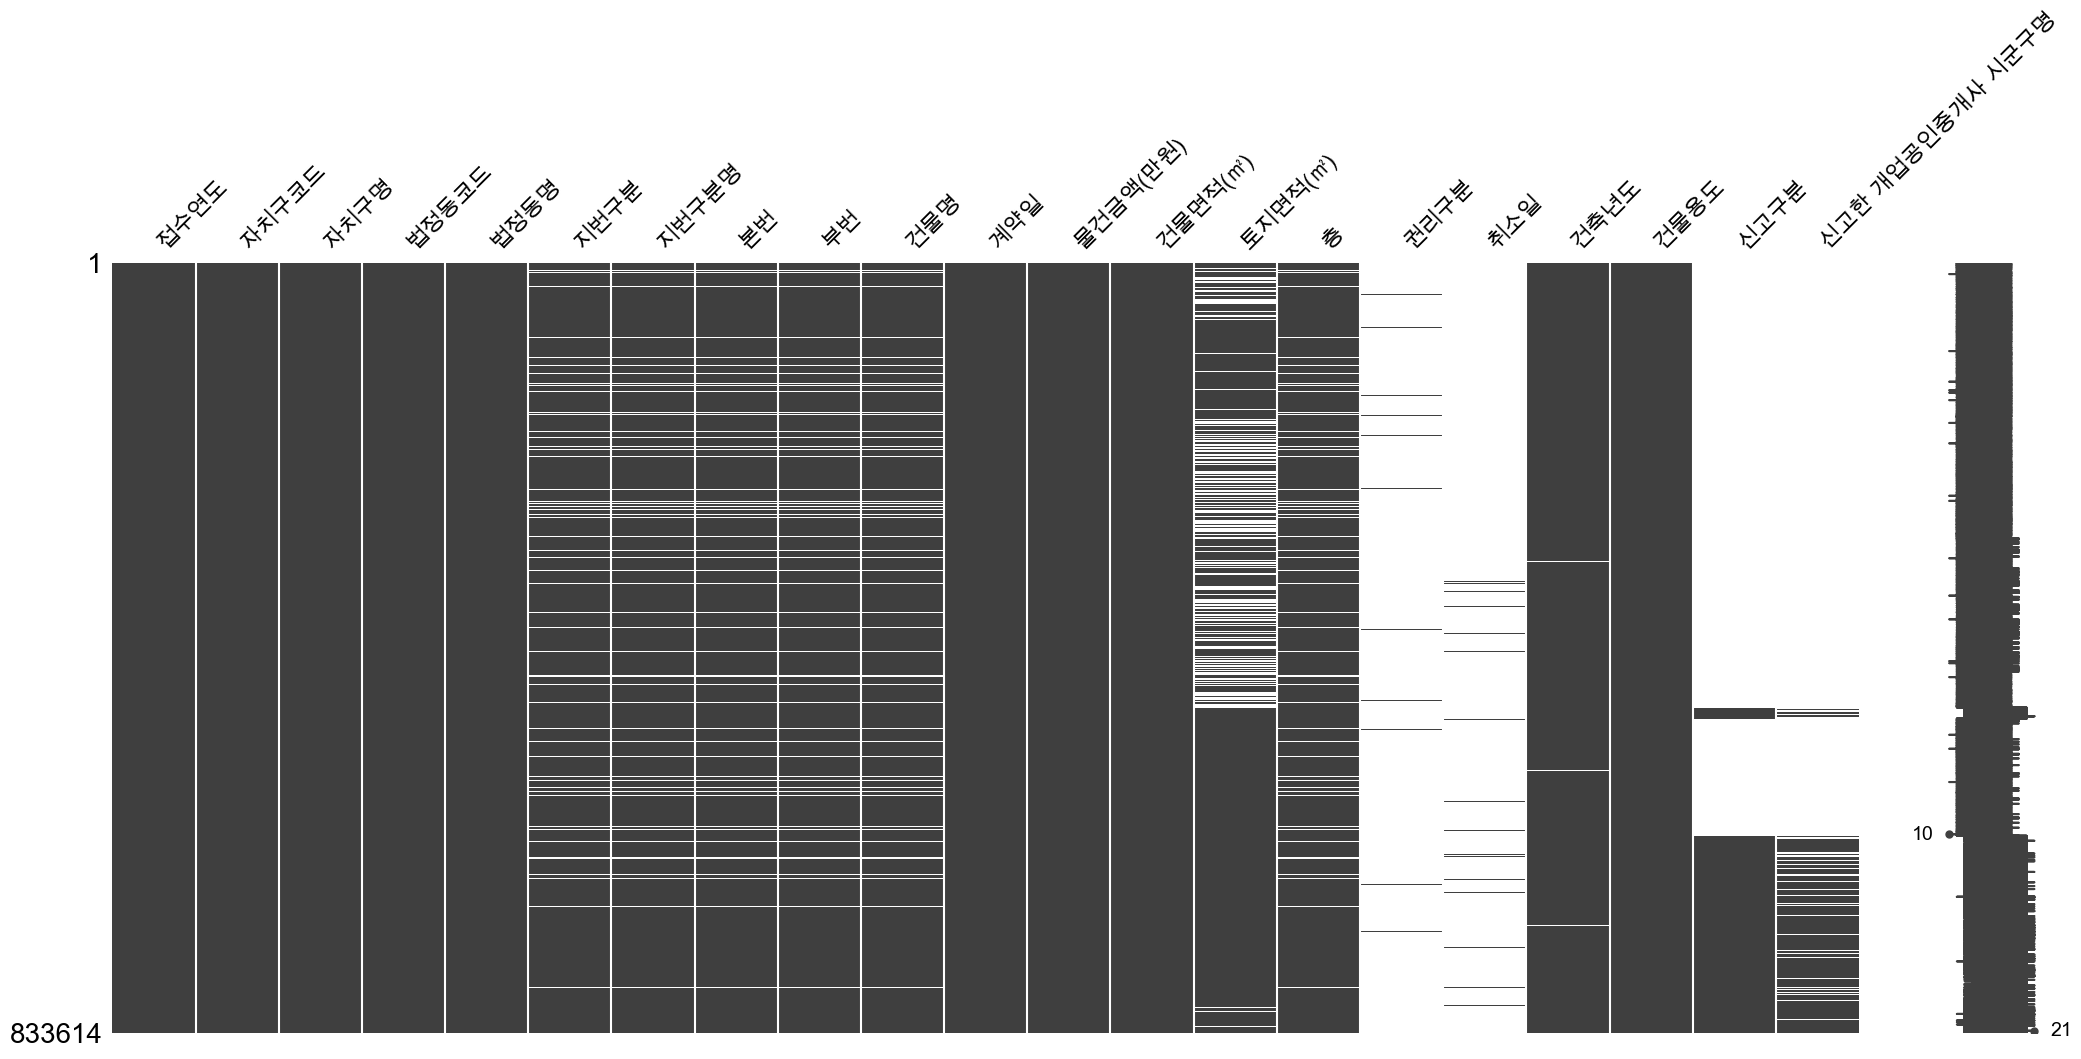

In [33]:
print('결측치 확인: \n', df_all.isnull().sum())
# df.dropna()
msno.matrix(df_all)

## 아파트 - 토지면적 NAN 이유 : 공동 소유여서 누구 것이라고 못하기 떄문에 null


In [34]:
# 층수가 null값, 단독 다가구 수와 동일. > 단독 다가구가 아닌 인상. 모든 녀석들은 층수가 있다.
# 건물용도가 아파트인 경우 토지면적(㎡) NaN
df_all[df_all['토지면적(㎡)'].isna()]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2018,11500,강서구,10300,화곡동,1.0,대지,1159.0,0.0,"우장산아이파크,이편한세상",...,95000,101.65,NaN,10.0,NaN,NaN,2008.0,아파트,NaN,NaN
1,2018,11410,서대문구,11200,대현동,1.0,대지,144.0,0.0,럭키대현,...,70000,83.38,NaN,10.0,NaN,NaN,1999.0,아파트,NaN,NaN
2,2018,11590,동작구,10700,사당동,1.0,대지,169.0,32.0,현대,...,49500,51.66,NaN,10.0,NaN,NaN,1991.0,아파트,NaN,NaN
13,2018,11380,은평구,10800,역촌동,1.0,대지,43.0,4.0,하늘애,...,47800,84.84,NaN,8.0,NaN,NaN,2007.0,아파트,NaN,NaN
15,2018,11320,도봉구,10600,방학동,1.0,대지,734.0,0.0,청구아파트,...,37000,84.97,NaN,7.0,NaN,NaN,1994.0,아파트,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77095,2024,11530,구로구,10700,개봉동,1.0,대지,0476,0000,한마을,...,77000,84.57,NaN,17.0,NaN,20240419.0,1999.0,아파트,중개거래,서울 구로구
77169,2024,11590,동작구,10200,상도동,1.0,대지,0431,0000,래미안상도3차,...,108000,84.96,NaN,2.0,NaN,20240129.0,2004.0,아파트,중개거래,서울 용산구
77316,2024,11500,강서구,10400,가양동,1.0,대지,1495,0000,한보구암마을,...,60000,59.58,NaN,3.0,NaN,20240228.0,1999.0,아파트,중개거래,서울 강서구
77511,2024,11320,도봉구,10600,방학동,1.0,대지,0522,0000,북한산팰리스아파트,...,50000,159.03,NaN,2.0,NaN,20240430.0,2001.0,아파트,직거래,NaN


# 범주화 - 신축구분 컬럼 추가

In [52]:
df_all['신축구분'] = 0
df_all['신축구분'] = df_all.apply(lambda x: np.nan if x['건축년도'] == 0 else ("신축" if x['건축년도'] > 2020 else "구축"), axis=1)

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_11414/2909294463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['신축구분'] = 0
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_11414/2909294463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['신축구분'] = df_all.apply(lambda x: np.nan if x['건축년도'] == 0 else ("신축" if x['건축년도'] > 2020 else "구축"), axis=1)


# ㎡ -> 평 전환, 평당가 구하기
- ㎡ / 평 변환표1㎡ = 0.3025평
- 평 / ㎡ 변환표1평 = 3.31㎡

In [53]:
df_all['평수'] = 0
df_all['평수'] = df_all.apply(lambda x : round(x['건물면적(㎡)']*0.3025,2), axis=1)
df_all['평당가'] = 0
df_all['평당가'] = df_all.apply(lambda x : round(x['물건금액(만원)']/x['평수'],2), axis=1)

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_11414/2535242817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['평수'] = 0
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_11414/2535242817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['평수'] = df_all.apply(lambda x : round(x['건물면적(㎡)']*0.3025,2), axis=1)
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_11414/2535242817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

# 이상치 - 계약 취소한 건 삭제 & 취소일 컬럼 삭제

In [36]:
df_all.drop(df_all[df_all['취소일'].notnull()].index, inplace=True)
df_all.drop(columns = ['취소일'],inplace=True)

## 데이터 타입 변환

In [37]:
df_all[df_all['본번'] == '00C1']

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,토지면적(㎡),층,권리구분,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,신축구분,평수,평당가
43319,2019,11260,중랑구,10500,망우동,3.0,블럭,00C1,0.0,신내역 힐데스하임참좋은,...,0.0,20.0,분양권,0.0,아파트,NaN,NaN,NaN,25.67,2244.49


In [38]:
# 알파벳이 섞인 본번, 부번 컬럼 사이  (숫자).0 으로 되어있는 값들은 숫자로 변환.
df_all['본번'] = df_all['본번'].apply(lambda x: pd.NA if pd.isna(x) else str(int(x)) if isinstance(x, float) else x) #object 로 저장됨.
df_all['부번'] = df_all['부번'].apply(lambda x: pd.NA if pd.isna(x) else str(int(x)) if isinstance(x, float) else x)

In [39]:
#0012 > #12 로 변환, 중복 제거
df_all['본번'] = df_all['본번'].apply(lambda x: pd.NA if pd.isna(x) else x.lstrip('0') if isinstance(x, str) else x)
df_all['부번'] = df_all['부번'].apply(lambda x: pd.NA if pd.isna(x) else x.lstrip('0') if isinstance(x, str) else x)

// 자치구코드,자치구명

// 법정동코드,법정동명

// 지번구분,지번구분명 모두 같은 의미를 포함하는 중복데이터. 성능 위해서는 숫자로 하는 게 좋지만 편한 분석 위해서 코드화 된 컬럼제외.

// 사용하지 않는 신고구분, 신고한 개업공인중개사 시군구명 칼럼 제외

In [40]:
df_all = df_all[['접수연도', '자치구명', '법정동명','지번구분명','본번', '부번',
    '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층',
    '건축년도', '건물용도']]

In [41]:
#df_all['계약일'] = pd.to_datetime(df_all['계약일'],format='%Y')
#df_all['접수연도']= pd.to_datetime(df_all['접수연도'],format='%Y')
#df_all['건축년도'] = pd.to_datetime(df_all['건축년도'])

In [35]:
df_all.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2018,11500,강서구,10300,화곡동,1.0,대지,1159.0,0.0,"우장산아이파크,이편한세상",...,95000,101.65,NaN,10.0,NaN,NaN,2008.0,아파트,NaN,NaN
1,2018,11410,서대문구,11200,대현동,1.0,대지,144.0,0.0,럭키대현,...,70000,83.38,NaN,10.0,NaN,NaN,1999.0,아파트,NaN,NaN
2,2018,11590,동작구,10700,사당동,1.0,대지,169.0,32.0,현대,...,49500,51.66,NaN,10.0,NaN,NaN,1991.0,아파트,NaN,NaN
3,2018,11350,노원구,10500,상계동,1.0,대지,1380.0,4.0,초산빌라,...,16000,41.37,18.38,1.0,NaN,NaN,1996.0,연립다세대,NaN,NaN
4,2018,11380,은평구,11000,증산동,1.0,대지,189.0,63.0,궁전맨션(189-63),...,43000,54.34,27.17,2.0,NaN,NaN,1992.0,연립다세대,NaN,NaN


# 결측값 ffill, bfill try

In [36]:
#건물명 비었고 본번 notnull 인 경우
noname_df = df_all[df_all['본번'].notnull() & df_all['건물명'].isna()]
noname_df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
1117,2021,11215,광진구,10700,화양동,1.0,대지,0111,12.0,NaN,...,48200,27.82,48.71,19.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구
1580,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30350,29.99,36.23,6.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
1582,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30350,29.99,36.23,6.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
1586,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30350,29.99,36.23,5.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
1594,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30000,29.95,36.19,5.0,NaN,NaN,2021.0,오피스텔,직거래,NaN


In [37]:
noname_df.groupby(['자치구명','본번','부번']).mean('평수') # groupby 로 자치구명, 본번, 부번 그루핑
grouped_df = noname_df.groupby(['자치구명', '본번', '부번']).mean('평수').reset_index()
selected_columns = grouped_df[['자치구명', '본번', '부번']]
selected_columns

,자치구명,본번,부번
0,강남구,1194.0,1.0
1,강동구,0121,0000
2,광진구,111.0,12.0
3,광진구,0111,12.0
4,금천구,888.0,14.0
5,동작구,0182,3.0
6,양천구,988.0,5.0


In [38]:
merged_df = selected_columns.merge(df_all[['자치구명', '본번', '부번', '건물명']], how='left', on=['자치구명', '본번', '부번']).drop_duplicates()
last_building_names = merged_df[merged_df['건물명'].notna()].groupby(['자치구명', '본번', '부번']).last().reset_index()
last_building_names

,자치구명,본번,부번,건물명
0,강남구,1194.0,1.0,런던빌개포
1,동작구,0182,3.0,STUDIO사당35
2,양천구,988.0,5.0,중앙하이츠목동펠리시티


In [ ]:
df_all = df_all.merge(last_building_names, on=['자치구명', '본번', '부번'], how='left', suffixes=('', '_y'))
df_all['건물명'] = df_all['건물명'].fillna(df_all['건물명_y'])
df_all = df_all.drop(columns=['건물명_y'])
df_all

,접수연도,자치구명,법정동명,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,건물용도,건물명_y
0,2018,서대문구,대현동,대지,144,,럭키대현,20190316,70000,83.38,NaN,10.0,1999.0,아파트,NaN
1,2018,동작구,사당동,대지,169,32,현대,20190221,49500,51.66,NaN,10.0,1991.0,아파트,NaN
2,2018,노원구,상계동,대지,1380,4,초산빌라,20190121,16000,41.37,18.38,1.0,1996.0,연립다세대,NaN
3,2018,은평구,증산동,대지,189,63,궁전맨션(189-63),20190103,43000,54.34,27.17,2.0,1992.0,연립다세대,NaN
4,2018,은평구,대조동,대지,87,7,그린힐,20181229,25000,55.05,34.37,5.0,2013.0,연립다세대,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692384,2024,강동구,천호동,대지,330,24,경복빌라,20231121,28500,44.11,32.99,1.0,1991.0,연립다세대,NaN
692385,2024,광진구,화양동,대지,527,,KCC파크타운,20231114,19000,25.79,37.36,14.0,2005.0,오피스텔,NaN
692386,2024,마포구,합정동,대지,369,10,그레이스빌2차A,20231113,26300,22.44,12.65,5.0,2004.0,연립다세대,NaN
692387,2024,마포구,중동,대지,39,9,백명TRENDYAPT,20231111,76000,107.48,0.00,6.0,2004.0,아파트,NaN


In [41]:
noname_df = df_all[df_all['본번'].notnull() & df_all['건물명'].isna()]
noname_df

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
1117,2021,11215,광진구,10700,화양동,1.0,대지,0111,12.0,NaN,...,48200,27.82,48.71,19.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구
1580,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30350,29.99,36.23,6.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
1582,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30350,29.99,36.23,6.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
1586,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30350,29.99,36.23,5.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
1594,2021,11590,동작구,10700,사당동,1.0,대지,0182,3.0,NaN,...,30000,29.95,36.19,5.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39023,2023,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,NaN,...,26500,16.88,29.90,3.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 중구
39053,2023,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,NaN,...,25000,16.88,29.90,6.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구
57407,2023,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,NaN,...,24000,16.88,29.90,10.0,NaN,NaN,2021.0,오피스텔,직거래,NaN
59129,2023,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,NaN,...,25000,16.88,29.90,9.0,NaN,NaN,2021.0,오피스텔,직거래,NaN


# 건축용도 아파트만 필터링

In [42]:
df_all = df_all[df_all['건물용도']=='아파트']

# 3. Exploratory Data Analysis (EDA)

# 4. Visualization

In [43]:
df_2018.isna().sum()

접수연도                     0
자치구코드                    0
자치구명                     0
법정동코드                    0
법정동명                     0
지번구분                 14363
지번구분명                14363
본번                   14366
부번                   14366
건물명                  14346
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)              23830
층                    14346
권리구분                163980
취소일                 166717
건축년도                   245
건물용도                     0
신고구분                166717
신고한 개업공인중개사 시군구명    166717
dtype: int64

In [44]:
import matplotlib.pyplot as  plt
pd.DataFrame(data= df_2018.isnull().sum()/len(df_2018), columns=['nan_ratio'])

,nan_ratio
접수연도,0.000000
자치구코드,0.000000
자치구명,0.000000
법정동코드,0.000000
법정동명,0.000000
지번구분,0.086152
지번구분명,0.086152
본번,0.086170
부번,0.086170
건물명,0.086050


In [47]:
df_all

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2018,11500,강서구,10300,화곡동,1.0,대지,1159.0,0.0,"우장산아이파크,이편한세상",...,95000,101.650,NaN,10.0,NaN,NaN,2008.0,아파트,NaN,NaN
1,2018,11410,서대문구,11200,대현동,1.0,대지,144.0,0.0,럭키대현,...,70000,83.380,NaN,10.0,NaN,NaN,1999.0,아파트,NaN,NaN
2,2018,11590,동작구,10700,사당동,1.0,대지,169.0,32.0,현대,...,49500,51.660,NaN,10.0,NaN,NaN,1991.0,아파트,NaN,NaN
13,2018,11380,은평구,10800,역촌동,1.0,대지,43.0,4.0,하늘애,...,47800,84.840,NaN,8.0,NaN,NaN,2007.0,아파트,NaN,NaN
15,2018,11320,도봉구,10600,방학동,1.0,대지,734.0,0.0,청구아파트,...,37000,84.970,NaN,7.0,NaN,NaN,1994.0,아파트,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77508,2024,11680,강남구,10300,개포동,1.0,대지,1280,0000,래미안블레스티지,...,165000,49.909,0.0,15.0,NaN,20240229.0,2019.0,아파트,중개거래,서울 강남구
77510,2024,11440,마포구,11200,현석동,1.0,대지,0220,0000,밤섬힐스테이트,...,127500,59.400,0.0,24.0,NaN,20241007.0,1999.0,아파트,중개거래,서울 마포구
77511,2024,11320,도봉구,10600,방학동,1.0,대지,0522,0000,북한산팰리스아파트,...,50000,159.030,NaN,2.0,NaN,20240430.0,2001.0,아파트,직거래,NaN
77514,2024,11470,양천구,10100,신정동,1.0,대지,1307,0000,경남아너스빌,...,121500,84.990,NaN,2.0,NaN,20240228.0,2004.0,아파트,중개거래,서울 강서구


In [45]:
df_2018 [df_2018['지번구분'].isna() & df_2018['건물명'].notna()]['건물명'].unique()

array(['힐스테이트 서초 젠트리스'], dtype=object)

# 날짜. 범주형, 연속형, 

In [46]:
mask = ((df_all['건축년도'].isnull())|(df_all.건축년도 == '2020')|(df_all.건축년도 == '2021')|(df_all.건축년도 == '2022')|(df_all.건축년도 == '2023')|(df_all.건축년도 == '2024')) & (df_all.건물용도 == '아파트')
df_mask = df_all[mask]
df_mask

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
56426,2022,11380,은평구,10100,수색동,1.0,대지,418.0,0.0,DMCSKVIEW,...,137000,84.99,0.0,6.0,NaN,NaN,NaN,아파트,중개거래,서울 은평구
57971,2022,11380,은평구,10100,수색동,1.0,대지,418.0,0.0,DMCSKVIEW,...,140000,84.99,0.0,7.0,NaN,NaN,NaN,아파트,중개거래,서울 은평구


In [48]:
os.getcwd()

'/Users/jun/GitStudy/Data_4/Data/seoul_real_estate'

In [55]:
df_all.to_pickle("df_all.pkl")

In [56]:
df_main_preprocessed = df_all.copy()

In [57]:
df_all.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명', '신축구분', '평수', '평당가'],
      dtype='object')

In [58]:
df_강서구 = df_main_preprocessed[df_main_preprocessed['자치구명']=='강서구']
df_강서구 = df_강서구[(df_강서구['물건금액(만원)']<69000) & (df_강서구['층']>3) & (df_강서구['신축구분']=='신축')].reset_index()
df_강서구

,index,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,신축구분,평수,평당가
0,1044,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,7.0,NaN,NaN,2021.0,아파트,중개거래,경기 안양동안구,신축,6.67,5067.47
1,11324,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,4.0,NaN,NaN,2021.0,아파트,중개거래,서울 강서구,신축,6.67,4422.79
2,15297,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,8.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,4857.57
3,24388,2021,11500,강서구,10100,염창동,1.0,대지,0311,0.0,...,15.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,8.75,4720.00
4,25124,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,13.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,5055.47
5,25983,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,12.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,4310.34
6,36875,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,6.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,4197.90
7,57238,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,14.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,4827.59
8,70450,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,8.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,4482.76
9,71837,2021,11500,강서구,10200,등촌동,1.0,대지,0725,0.0,...,12.0,NaN,NaN,2021.0,아파트,NaN,NaN,신축,6.67,4782.61
